<a href="https://colab.research.google.com/github/Mounavanam/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

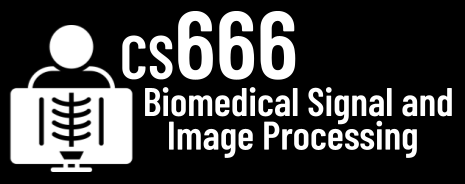

# Assignment 1

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [5]:
!pip install biosppy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [6]:
from biosppy import storage
ecg1, metadata = storage.load_txt('ecg.txt')

In [7]:
size(ecg1)
ecg1[0:15000]
ecg1
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [8]:
SAMPLING_RATE= 1000 ### TODO!
SECONDS = 15 ### TODO!

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [9]:
#import numpy as np
from biosppy.signals import ecg
output= ecg.ecg(signal=ecg1, sampling_rate=1000, show=False)

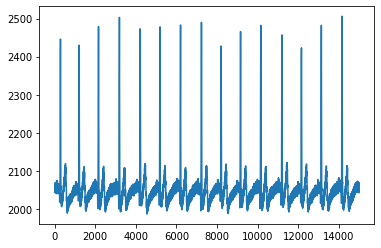

In [10]:
plt.plot(ecg1)

In [11]:
output

ReturnTuple(ts=array([0.0000e+00, 1.0000e-03, 2.0000e-03, ..., 1.4997e+01, 1.4998e+01,
       1.4999e+01]), filtered=array([86.59632358, 89.29577068, 91.89768614, ..., 92.65388691,
       89.66260537, 86.55395748]), rpeaks=array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162]), templates_ts=array([-2.00000000e-01, -1.99000000e-01, -1.98000000e-01, -1.97000000e-01,
       -1.96000000e-01, -1.95000000e-01, -1.94000000e-01, -1.93000000e-01,
       -1.92000000e-01, -1.91000000e-01, -1.90000000e-01, -1.89000000e-01,
       -1.88000000e-01, -1.87000000e-01, -1.86000000e-01, -1.85000000e-01,
       -1.84000000e-01, -1.83000000e-01, -1.82000000e-01, -1.81000000e-01,
       -1.80000000e-01, -1.79000000e-01, -1.78000000e-01, -1.77000000e-01,
       -1.76000000e-01, -1.75000000e-01, -1.74000000e-01, -1.73000000e-01,
       -1.72000000e-01, -1.71000000e-01, -1.70000000e-01, -1.69000000e-01,
       -1.68000000e-01, -1.67000000e-01, -1

array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162])

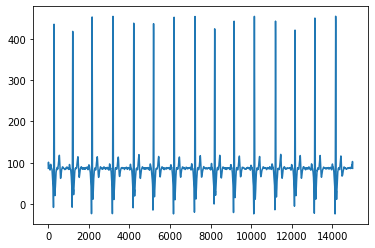

In [12]:
#rpeaks=ecg.hamilton_segmenter(signal=ecg1,sampling_rate=SAMPLING_RATE)

plt.plot(output['filtered'])
output['rpeaks']




**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

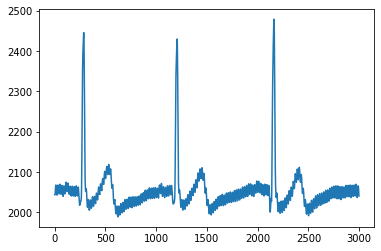

In [13]:
### TODO plot unfiltered signal
#raw signal
three_sec=ecg1[0:3*SAMPLING_RATE]
plt.plot(three_sec)
##I can spot the P,Q,R,S,T waves


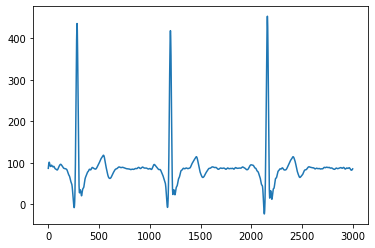

In [14]:
### TODO plot filtered signal
f_three_sec=output['filtered'][0:3*SAMPLING_RATE]
plt.plot(f_three_sec)

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

In [16]:
a=output['rpeaks']
a

array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162])

Text(0.5, 1.0, 'Whole Filtered Signal with r-peaks')

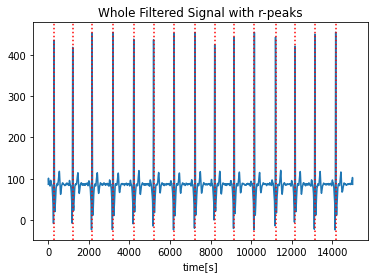

In [17]:
### TODO
plt.plot(output['filtered'])
for x1 in a:
  ###print (x1)
  plt.axvline(x=x1,color='r',ls=':')
plt.xlabel('time[s]')
plt.title('Whole Filtered Signal with r-peaks')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [18]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.3 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [ ]:
##import neurokit2 as nk

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


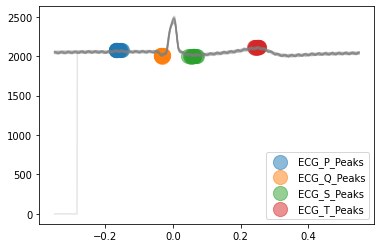

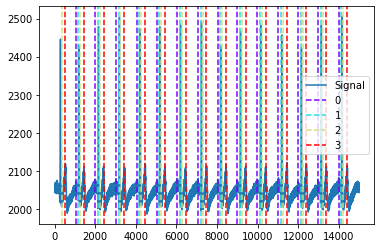

In [21]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
_, waves_peak = nk.ecg_delineate(ecg1,a,sampling_rate=SAMPLING_RATE,method="peak",show=True,show_type='peaks')
###Yes,I can see the P Q S T waves in the raw signal using nk.ecg_delineate.
##waves_peak
plot = nk.events_plot([waves_peak['ECG_P_Peaks'], 
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks'],
                       waves_peak['ECG_T_Peaks']], ecg1)
# Hint 1: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

In [ ]:
# TODO Did the detection work well?
## yes,the detection works well.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


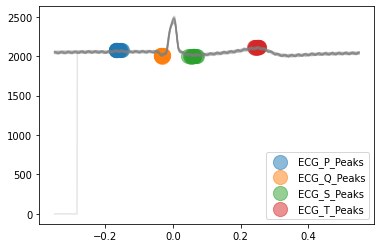

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak = nk.ecg_delineate(ecg1,a,sampling_rate=SAMPLING_RATE,method="peak",show=True,show_type='peaks')

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


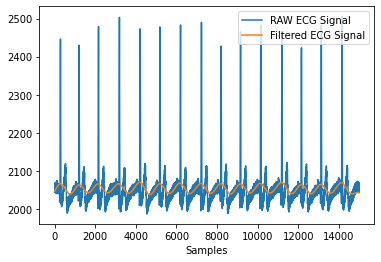

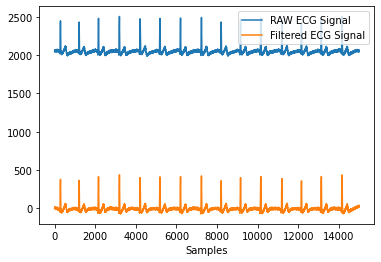

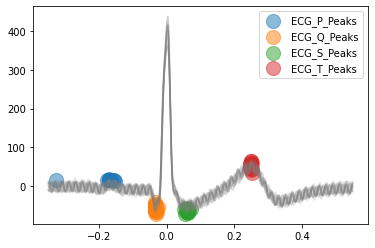

In [27]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 

f_signal=nk.signal_filter(ecg1, lowcut=0,highcut=1)
plot=nk.signal_plot([ecg1,f_signal], labels=['RAW ECG Signal','Filtered ECG Signal'])

f_signal=nk.signal_filter(ecg1, lowcut=1,highcut=120)
plot=nk.signal_plot([ecg1,f_signal], labels=['RAW ECG Signal','Filtered ECG Signal'])

_, waves_peak = nk.ecg_delineate(f_signal, a, sampling_rate=SAMPLING_RATE, method="dwt",show=True, show_type='peaks')



# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
##I think lowcut,highcut)=(0,120) works well.
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


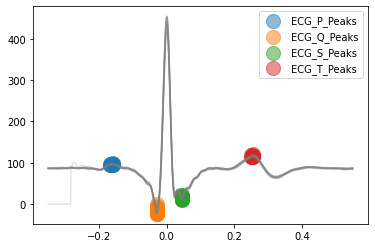

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(output['filtered'], a, sampling_rate=SAMPLING_RATE, method="dwt",show=True, show_type='peaks')


In [ ]:
# TODO Which one works the best?
##delineation on the filtered signal from biosppy works well.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#